# Compare speed and similarity in results for two cross-validation schemes (and evaluation without cross-validation)

Cross-validation is important for 1) tuning to determine alpha and lambda parameters in elastic net models, and 2) evaluating performance of optimized models while parameters are fixed.

We wish to perform cross-validation in a manner that will give us the best cost/benefit ratio with respect to computational expense and model quality.

## Prepare inputs

In [1]:
library(CpGWAS)

Let's run these tests over a very small chunk on one chromosome.

In [2]:
scaff_paths <- list.files("../output/", pattern = "rds", full.names = TRUE)
scaff_paths <- scaff_paths[grepl("1000000", scaff_paths)]
scaff_paths <- scaff_paths[grepl("1corestotal-1", scaff_paths)]

In [3]:
scaff_paths

[1] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519.rds"
[2] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240201-121737.rds"
[3] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-1corepera-20240131-122515.rds" 
[4] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-1corepera-20240201-121736.rds"

In [4]:
convertToDataFrame <- function(object) {
  if (!inherits(object, "MethylationScaff")) {
    stop("The object must be of class 'MethylationScaff'.")
  }

  modelsList <- lapply(object@models, function(model) {
    data.frame(
      scaffoldIdentifier = object@scaffoldIdentifier,  # Scaffold identifier is the same for all models
      methylationPosition = model@methylationPosition,
      windowSize = model@windowSize,
      nSNPs = model@n_SNPs,
      cor = model@evaluation_results['cor'],
      mse = model@evaluation_results['mse'],
      alpha = model@alpha,
      lambda = model@lambda
    )
  })

  do.call("rbind", modelsList)
}

In [5]:
scaff_paths[1]

[1] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519.rds"

In [6]:
my_scaff <- readRDS(scaff_paths[1])
dynamic_a1 <- convertToDataFrame(my_scaff)
dynamic_a1 <- dynamic_a1[which(dynamic_a1$windowSize == 500000), ]
dynamic_a1$scaffoldIdentifier <- NULL
rownames(dynamic_a1) <- NULL

my_scaff <- readRDS(scaff_paths[2])
dynamic_a2 <- convertToDataFrame(my_scaff)
dynamic_a2 <- dynamic_a2[which(dynamic_a2$windowSize == 500000), ]
dynamic_a2$scaffoldIdentifier <- NULL
rownames(dynamic_a2) <- NULL

In [7]:
my_scaff <- readRDS(scaff_paths[3])
static_a1 <- convertToDataFrame(my_scaff)
static_a1 <- static_a1[which(static_a1$windowSize == 500000), ]
static_a1$scaffoldIdentifier <- NULL
rownames(static_a1) <- NULL

my_scaff <- readRDS(scaff_paths[4])
static_a2 <- convertToDataFrame(my_scaff)
static_a2 <- static_a2[which(static_a2$windowSize == 500000), ]
static_a2$scaffoldIdentifier <- NULL
rownames(static_a2) <- NULL

In [8]:
head(static_a1)

,methylationPosition,windowSize,nSNPs,cor,mse,alpha,lambda
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,87818200,5e+05,1336,NA,0.001744463,1.00,0.01501961
2,87818244,5e+05,1336,0.3439916,0.001803783,0.25,0.06116361
3,87818262,5e+05,1336,0.3630955,0.001829206,1.00,0.01539943
4,87818291,5e+05,1336,0.3330700,0.001862859,0.50,0.03114232
5,87818777,5e+05,1336,NA,0.002386295,0.50,0.03551514
6,87818847,5e+05,1336,NA,0.002464322,0.25,0.07178005


In [9]:
head(dynamic_a1)

,methylationPosition,windowSize,nSNPs,cor,mse,alpha,lambda
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,87818200,5e+05,1336,NA,0.001787894,0.25,0.06007843
2,87818244,5e+05,1336,NA,0.001844521,0.25,0.06116361
3,87818262,5e+05,1336,NA,0.001867693,0.25,0.06159771
4,87818291,5e+05,1336,NA,0.001904980,0.25,0.06228463
5,87818777,5e+05,1336,NA,0.002460579,0.25,0.07103029
6,87818847,5e+05,1336,NA,0.002519113,0.25,0.07178005


In [10]:
a1 <- merge(static_a1, dynamic_a1, by = c("methylationPosition"))
a2 <- merge(static_a2, dynamic_a2, by = c("methylationPosition"))
static <- merge(static_a1, static_a2, by = c("methylationPosition"))
dynamic <- merge(dynamic_a1, dynamic_a2, by = c("methylationPosition"))

In [11]:
dim(a1)

[1] 1001   13

In [12]:
a1_wna <- a1
a2_wna <- a2
static_wna <- static
dynamic_wna <- dynamic

In [13]:
a1 <- na.omit(a1)
a2 <- na.omit(a2)
static <- na.omit(static)
dynamic <- na.omit(dynamic)

In [14]:
head(a1)

,methylationPosition,windowSize.x,nSNPs.x,cor.x,mse.x,alpha.x,lambda.x,windowSize.y,nSNPs.y,cor.y,mse.y,alpha.y,lambda.y
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
34,87822757,5e+05,1339,0.1921681,0.0008385976,0.25,0.03170974,5e+05,1339,-0.1034239,0.0008483484,0.25,0.03170974
154,87838374,5e+05,1345,0.4655205,0.0008836829,1.00,0.01307527,5e+05,1345,0.2095662,0.0008910155,1.00,0.01191370
156,87838438,5e+05,1345,0.5001115,0.0009103363,1.00,0.01342609,5e+05,1345,0.2151021,0.0009103508,1.00,0.01167733
162,87838774,5e+05,1345,0.5143818,0.0008815383,0.50,0.01992202,5e+05,1345,0.3940980,0.0009720615,0.25,0.04174124
163,87839806,5e+05,1349,0.6465726,0.0009100125,0.25,0.04221312,5e+05,1349,0.5438425,0.0009744286,0.25,0.02909586
164,87839885,5e+05,1350,0.6442483,0.0009098499,0.25,0.04287549,5e+05,1350,0.5515906,0.0009714046,0.25,0.02955241


In [15]:
library(ggplot2)
library(ggpubr)

In [16]:
dim(a1)

[1] 129  13

Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.”
`geom_smooth()` using formula = 'y ~ x'


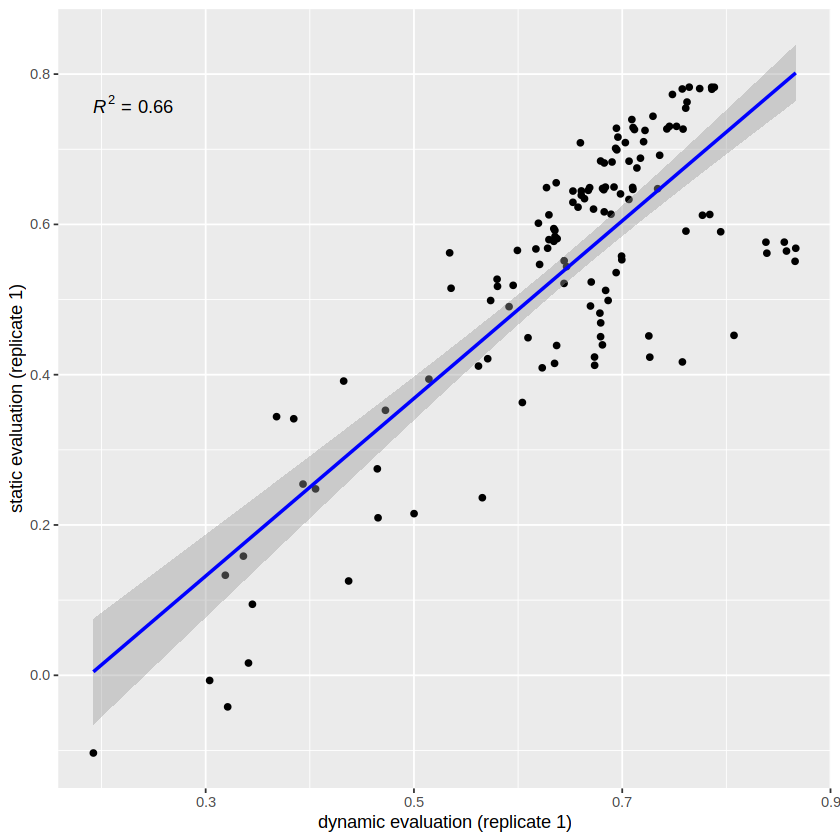

In [17]:
# Create the scatter plot
ggplot(a1, aes(x = cor.x, y = cor.y)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  #geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  #annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left") +  # Add R²
  labs(x = "dynamic evaluation (replicate 1)", y = "static evaluation (replicate 1)")  # Axis titles

In [78]:
dim(a1_wna)

[1] 1001   13

In [79]:
a1_wna

methylationPosition,windowSize.x,nSNPs.x,cor.x,mse.x,alpha.x,lambda.x,windowSize.y,nSNPs.y,cor.y,mse.y,alpha.y,lambda.y
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
87818200,5e+05,1336,NA,0.001744463,1.00,0.01501961,5e+05,1336,NA,0.001787894,0.25,0.06007843
87818244,5e+05,1336,0.3439916,0.001803783,0.25,0.06116361,5e+05,1336,NA,0.001844521,0.25,0.06116361
87818262,5e+05,1336,0.3630955,0.001829206,1.00,0.01539943,5e+05,1336,NA,0.001867693,0.25,0.06159771
87818291,5e+05,1336,0.3330700,0.001862859,0.50,0.03114232,5e+05,1336,NA,0.001904980,0.25,0.06228463
87818777,5e+05,1336,NA,0.002386295,0.50,0.03551514,5e+05,1336,NA,0.002460579,0.25,0.07103029
87818847,5e+05,1336,NA,0.002464322,0.25,0.07178005,5e+05,1336,NA,0.002519113,0.25,0.07178005
87819360,5e+05,1337,0.3474374,0.002587177,1.00,0.01796823,5e+05,1337,NA,0.002637934,0.25,0.07187291
87819622,5e+05,1338,NA,0.002395412,1.00,0.01680380,5e+05,1338,NA,0.002436220,0.25,0.06721519
87819799,5e+05,1338,0.3492625,0.002219904,0.25,0.06254251,5e+05,1338,NA,0.002258269,0.25,0.06254251


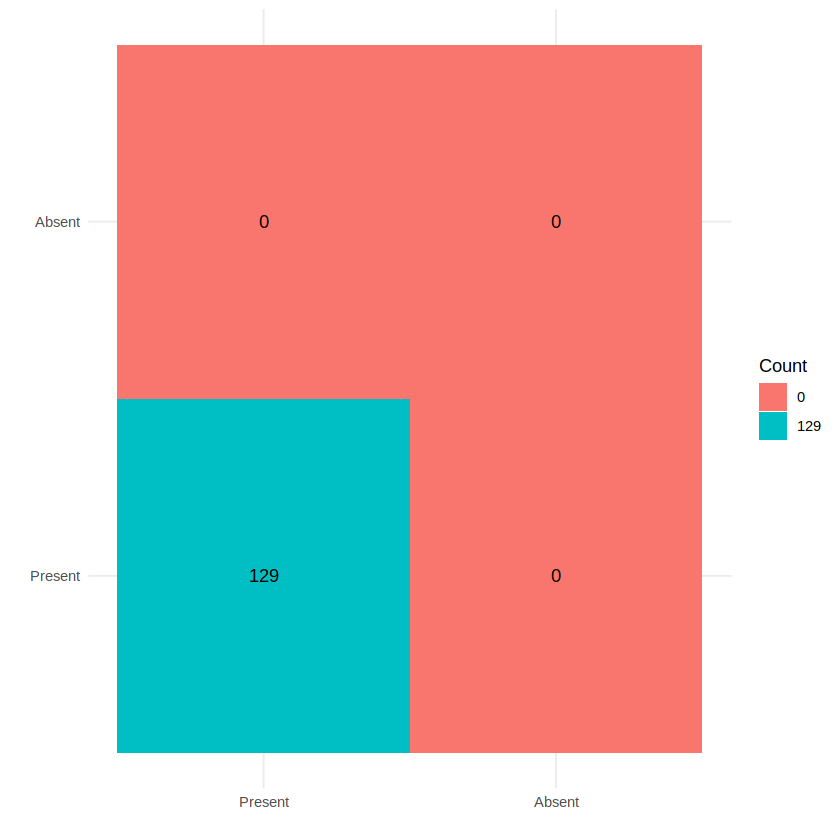

In [77]:
# Create a summary table of NA occurrences
na_summary <- with(a1_wna, expand.grid(cor.x = c("Present", "Absent"), cor.y = c("Present", "Absent")))
na_summary$count <- with(a1, c(
  sum(!is.na(cor.x) & !is.na(cor.y)),
  sum(!is.na(cor.x) & is.na(cor.y)),
  sum(is.na(cor.x) & !is.na(cor.y)),
  sum(is.na(cor.x) & is.na(cor.y))
))

# Plot the summary as a matrix
ggplot(na_summary, aes(x = cor.x, y = cor.y, fill = factor(count))) +
  geom_tile() +
  geom_text(aes(label = count)) +
  labs(x = "", y = "", fill = "Count") +
  #scale_fill_viridis_c() +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


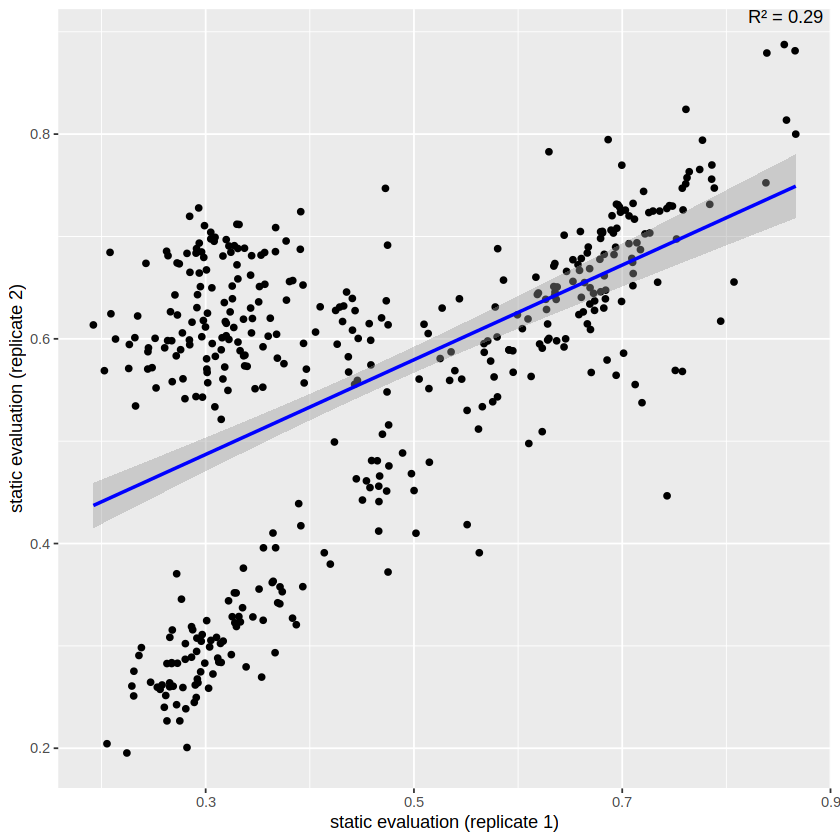

In [58]:
# Assuming a1 is your data frame with cor.x and cor.y

# Calculate linear model
model <- lm(cor.y ~ cor.x, data = static)

# Calculate R-squared
r_squared <- summary(model)$r.squared

# Create the scatter plot with R² annotation
ggplot(static, aes(x = cor.x, y = cor.y)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  # geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line, if needed
  annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  labs(x = "static evaluation (replicate 1)", y = "static evaluation (replicate 2)")


`geom_smooth()` using formula = 'y ~ x'


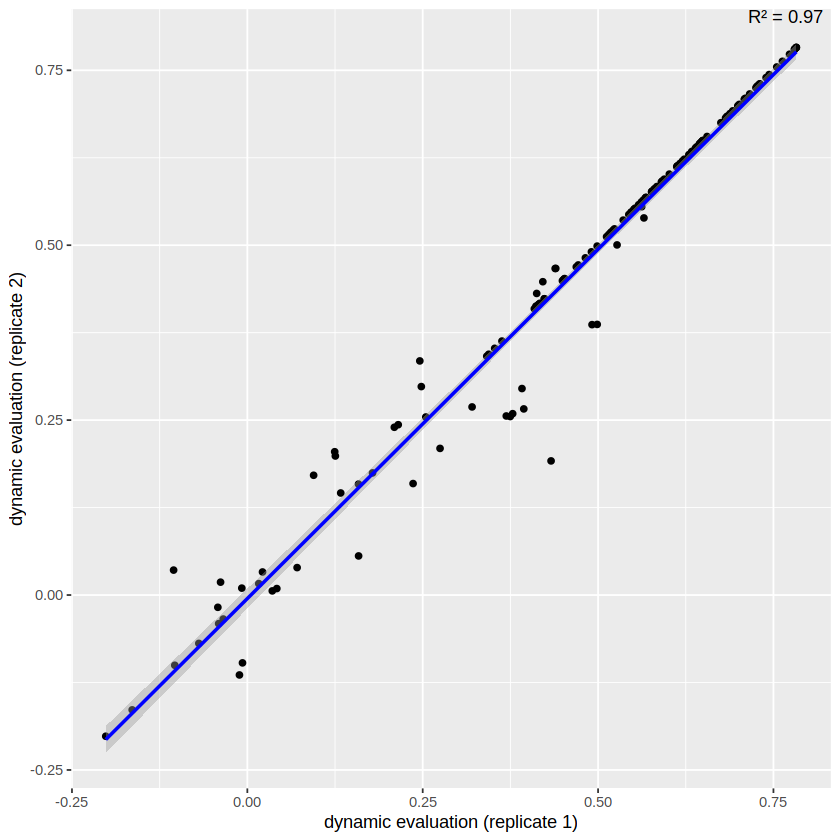

In [59]:
# Assuming a1 is your data frame with cor.x and cor.y

# Calculate linear model
model <- lm(cor.y ~ cor.x, data = dynamic)

# Calculate R-squared
r_squared <- summary(model)$r.squared

# Create the scatter plot with R² annotation
ggplot(dynamic, aes(x = cor.x, y = cor.y)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  # geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line, if needed
  annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  labs(x = "dynamic evaluation (replicate 1)", y = "dynamic evaluation (replicate 2)")
